# Solving AT1 Q1 - finding shortest path and diameter in weighted edges graph

![question](images/AT1-Q1-question-figure.png)

In [1]:
# construct the graph 

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from("ABCDEFGHIJK")

In [2]:
weighted_edges = [
    ('A','B',2),('A','C',1),('A','E',3),
    ('B','E',1),
    ('C','I',2),('C','F',3),('C','D',4),
    ('D','F',1),('D','J',2),('D','K',3),
    ('E','I',4),
    ('F','J',3),('F','G',3),
    ('G','I',1),('G','J',1),('G','H',5),
    ('H','J',1),('H','K',4),
    #('I'),
    ('J','K',2)#,
    #('K')
]

pos = {
    "A": (2,8), 
    "B": (1,5), 
    "C": (5,8.5),
    "D": (6,4),
    "E": (4,4.5), 
    "F": (8,6), 
    "G": (11,7), 
    "H": (13, 6), 
    "I": (8.5, 8.5), 
    "J": (10, 3.5), 
    "K": (12,1)
    }

In [3]:
G.add_weighted_edges_from(weighted_edges)
edge_labels = nx.get_edge_attributes(G,'weight')

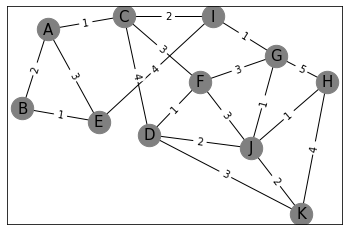

In [4]:
# pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='grey')
nx.draw_networkx_labels(G,pos,font_size=15,font_family='sans-serif')
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
plt.show()

In [5]:
print(f"Number of nodes: {G.order()}")
print(f"Number of edges: {G.size()}")

Number of nodes: 11
Number of edges: 19


In [6]:
# find shortest path from A to K
A_K_shortestpath = nx.dijkstra_path(G, source='A',target='K')
A_K_shortestpath_length = nx.dijkstra_path_length(G, source='A', target=A_K_shortestpath[-1])

In [7]:
print(f"shortest path from A to K is {A_K_shortestpath_length} long: {'-'.join(A_K_shortestpath)}")

shortest path from A to K is 7 long: A-C-I-G-J-K


In [8]:
nodes_list = list(G.nodes)

diameter = 0
diameter_path = None
for i, start_n in enumerate(G.nodes): 
    print(i, start_n)
    nodes_list.pop(0) # remove current node from nodes list
    str = ""

    diameter_updated = False
    for j, target_n in enumerate(nodes_list):
        shortest_path = nx.dijkstra_path(G, source=start_n, target=target_n)
        shortest_path_length = nx.dijkstra_path_length(G, source=start_n, target=target_n)
        str = str + f"({j}, {target_n}, {'-'.join(shortest_path)}, {shortest_path_length})"
        if shortest_path_length > diameter:
            diameter = shortest_path_length
            diameter_path = shortest_path
            diameter_updated = True
    print(str)
    print(f"{'update diameter' if diameter_updated else ''}")

0 A
(0, B, A-B, 2)(1, C, A-C, 1)(2, D, A-C-D, 5)(3, E, A-E, 3)(4, F, A-C-F, 4)(5, G, A-C-I-G, 4)(6, H, A-C-I-G-J-H, 6)(7, I, A-C-I, 3)(8, J, A-C-I-G-J, 5)(9, K, A-C-I-G-J-K, 7)
update diameter
1 B
(0, C, B-A-C, 3)(1, D, B-A-C-D, 7)(2, E, B-E, 1)(3, F, B-A-C-F, 6)(4, G, B-E-I-G, 6)(5, H, B-E-I-G-J-H, 8)(6, I, B-E-I, 5)(7, J, B-E-I-G-J, 7)(8, K, B-E-I-G-J-K, 9)
update diameter
2 C
(0, D, C-D, 4)(1, E, C-A-E, 4)(2, F, C-F, 3)(3, G, C-I-G, 3)(4, H, C-I-G-J-H, 5)(5, I, C-I, 2)(6, J, C-I-G-J, 4)(7, K, C-I-G-J-K, 6)

3 D
(0, E, D-J-G-I-E, 8)(1, F, D-F, 1)(2, G, D-J-G, 3)(3, H, D-J-H, 3)(4, I, D-J-G-I, 4)(5, J, D-J, 2)(6, K, D-K, 3)

4 E
(0, F, E-A-C-F, 7)(1, G, E-I-G, 5)(2, H, E-I-G-J-H, 7)(3, I, E-I, 4)(4, J, E-I-G-J, 6)(5, K, E-I-G-J-K, 8)

5 F
(0, G, F-G, 3)(1, H, F-J-H, 4)(2, I, F-G-I, 4)(3, J, F-J, 3)(4, K, F-D-K, 4)

6 G
(0, H, G-J-H, 2)(1, I, G-I, 1)(2, J, G-J, 1)(3, K, G-J-K, 3)

7 H
(0, I, H-J-G-I, 3)(1, J, H-J, 1)(2, K, H-J-K, 3)

8 I
(0, J, I-G-J, 2)(1, K, I-G-J-K, 4)

9 J
(0, K, J

In [9]:
print(f"network diamter is {diameter} along path {'-'.join(diameter_path)}")

network diamter is 9 along path B-E-I-G-J-K
